In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from tensorflow.keras.preprocessing.image import (
    ImageDataGenerator,
    img_to_array,
    load_img,
)
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy

In [7]:
base_model = MobileNet(input_shape=(224, 224, 3), include_top=False)

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=7, activation="softmax")(x)

model = Model(base_model.input, x)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,580,103 (13.66 MB)

 Trainable params: 351,239 (1.34 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [9]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [12]:
train_datagen = ImageDataGenerator(
    zoom_range=0.2, shear_range=0.2, horizontal_flip=True, rescale=1.0 / 255
)

train_data = train_datagen.flow_from_directory(
    directory="./archive (1)/train",
    target_size=(224, 224),
    batch_size=32,
)
train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [13]:
val_datagen = ImageDataGenerator(rescale=1 / 255)

val_data = val_datagen.flow_from_directory(
    directory="./archive (1)/train", target_size=(224, 224), batch_size=32
)

Found 28709 images belonging to 7 classes.


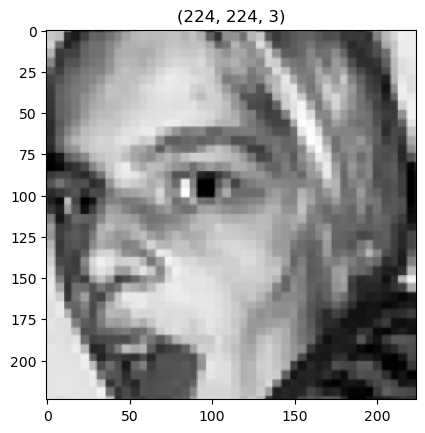

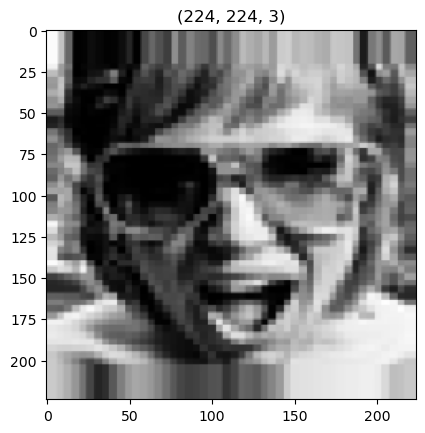

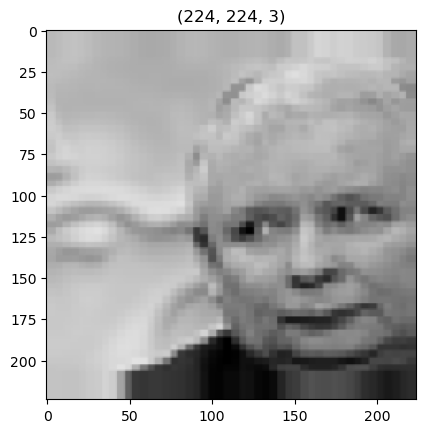

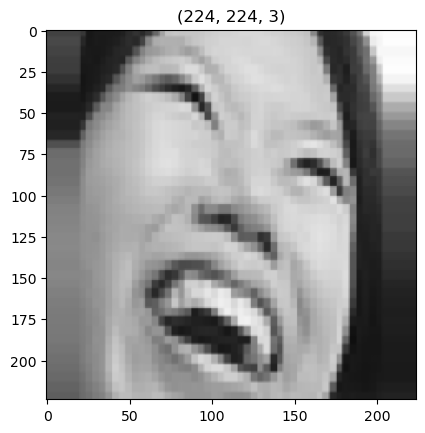

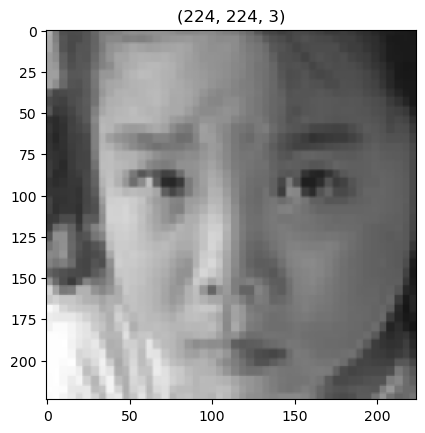

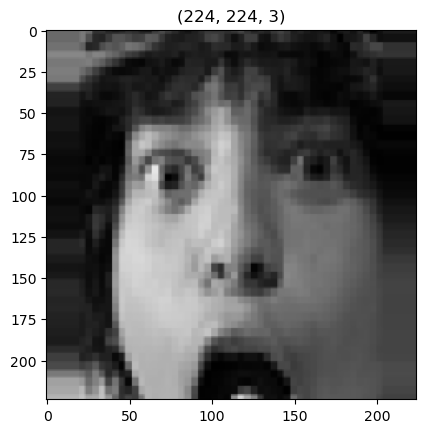

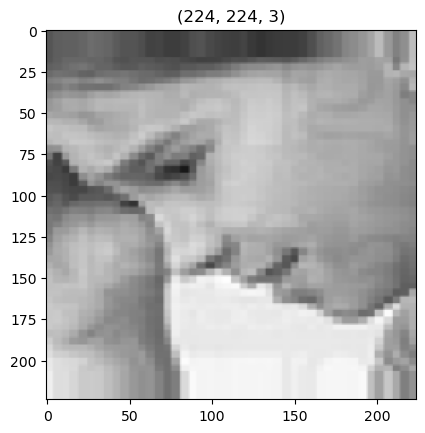

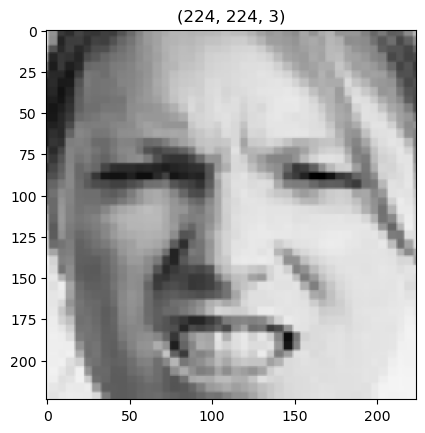

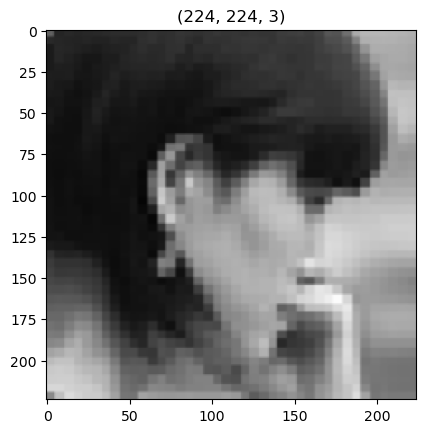

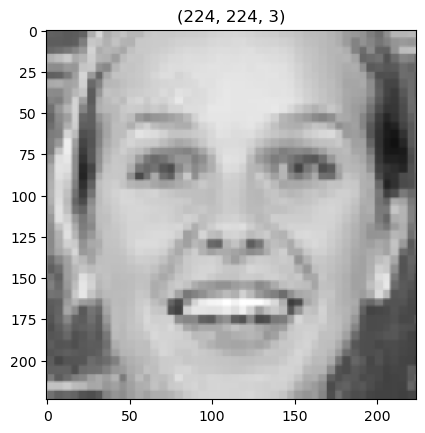

In [15]:
# to visualize the images in the traing data denerator

t_img, label = next(train_data)


# -----------------------------------------------------------------------------
# function when called will prot the images
def plotImages(img_arr, label):
    """
    input  :- images array
    output :- plots the images
    """
    count = 0
    for im, l in zip(img_arr, label):
        plt.imshow(im)
        plt.title(im.shape)
        plt.axis = False
        plt.show()

        count += 1
        if count == 10:
            break


# -----------------------------------------------------------------------------
# function call to plot the images
plotImages(t_img, label)

In [17]:
## having early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(
    monitor="val_accuracy", min_delta=0.01, patience=5, verbose=1, mode="auto"
)

# model check point
mc = ModelCheckpoint(
    filepath="best_model.h5.keras",
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    mode="auto",
)

# puting call back in a list
call_back = [es, mc]

In [22]:
# hist = model.fit_generator(train_data,
#                            steps_per_epoch= 10,
#                            epochs= 30,
#                            validation_data= val_data,
#                            validation_steps= 8,
#                            callbacks=[es,mc])

# hist = Model.fit(
#     train_data,
#     steps_per_epoch=10,
#     epochs=30,
#     validation_data=val_data,
#     validation_steps=8,
#     callbacks=[es, mc],
# )

history = model.fit(
    train_data,
    steps_per_epoch=10,
    validation_data=val_data,
    validation_steps=8,
    epochs=30,
    callbacks=[es, mc],
)

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.1566 - loss: 16.6775
Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to best_model.h5.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 335ms/step - accuracy: 0.1622 - loss: 16.6426 - val_accuracy: 0.2500 - val_loss: 8.1146
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.2022 - loss: 11.8523
Epoch 2: val_accuracy improved from 0.25000 to 0.37500, saving model to best_model.h5.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 286ms/step - accuracy: 0.2046 - loss: 11.7855 - val_accuracy: 0.3750 - val_loss: 8.1622
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.2810 - loss: 10.4612
Epoch 3: val_accuracy did not improve from 0.37500
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 271ms/step - accuracy: 0.2841 - loss: 10.2949 - val_accuracy: 0.3008 - val_loss: 8.8253
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.3852 - loss: 6.2804
Epoch 4: val_accuracy did not improve from 0.37500
10/10 ━━━━━━━━━━━━━━━━━━━━ 

In [24]:
# Loading the best fit model
from keras.models import load_model

model = load_model("./best_model.h5.keras")

In [26]:
h = history.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

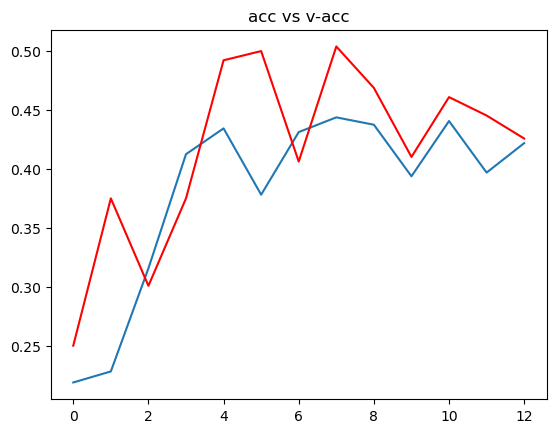

In [27]:
plt.plot(h["accuracy"])
plt.plot(h["val_accuracy"], c="red")
plt.title("acc vs v-acc")
plt.show()

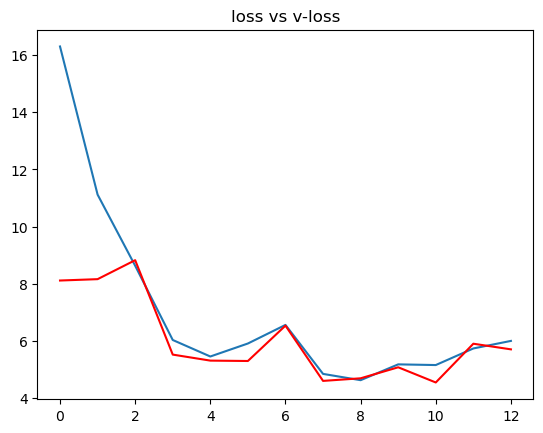

In [28]:
plt.plot(h["loss"])
plt.plot(h["val_loss"], c="red")
plt.title("loss vs v-loss")
plt.show()

In [29]:
# just to map o/p values
op = dict(zip(train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
 the image is of fearful


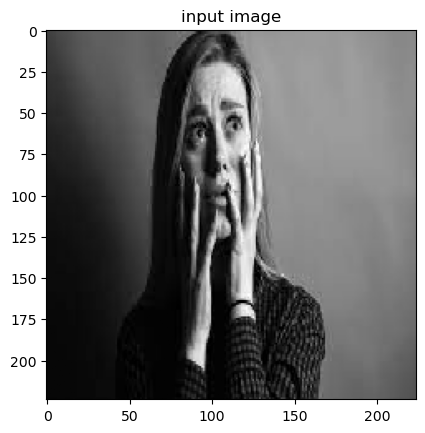

In [32]:
# path for the image to see if it predics correct class

path = "./train/Fear/download (10).jpg"
img = load_img(path, target_size=(224, 224))

i = img_to_array(img) / 255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()